In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
lol_df = pd.read_csv(r"high_diamond_ranked_10min.csv")
lol_df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [3]:
#Checking the general Information
lol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [4]:
#copying the dataframe in another variable
lol = lol_df.copy()

In [5]:
#Lets Drop some columns that are unecessary
#We will also try to drop maximum red cloumns since the data asks us to predict for blue
columns = ['gameId', 'redFirstBlood', 'redKills', 'redEliteMonsters', 'redDragons','redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin', 'redHeralds',
       'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'blueTotalMinionsKilled']

lol = lol.drop(columns, axis = 1)

In [6]:
lol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueAvgLevel                  9879 non-null   float64
 13  blu

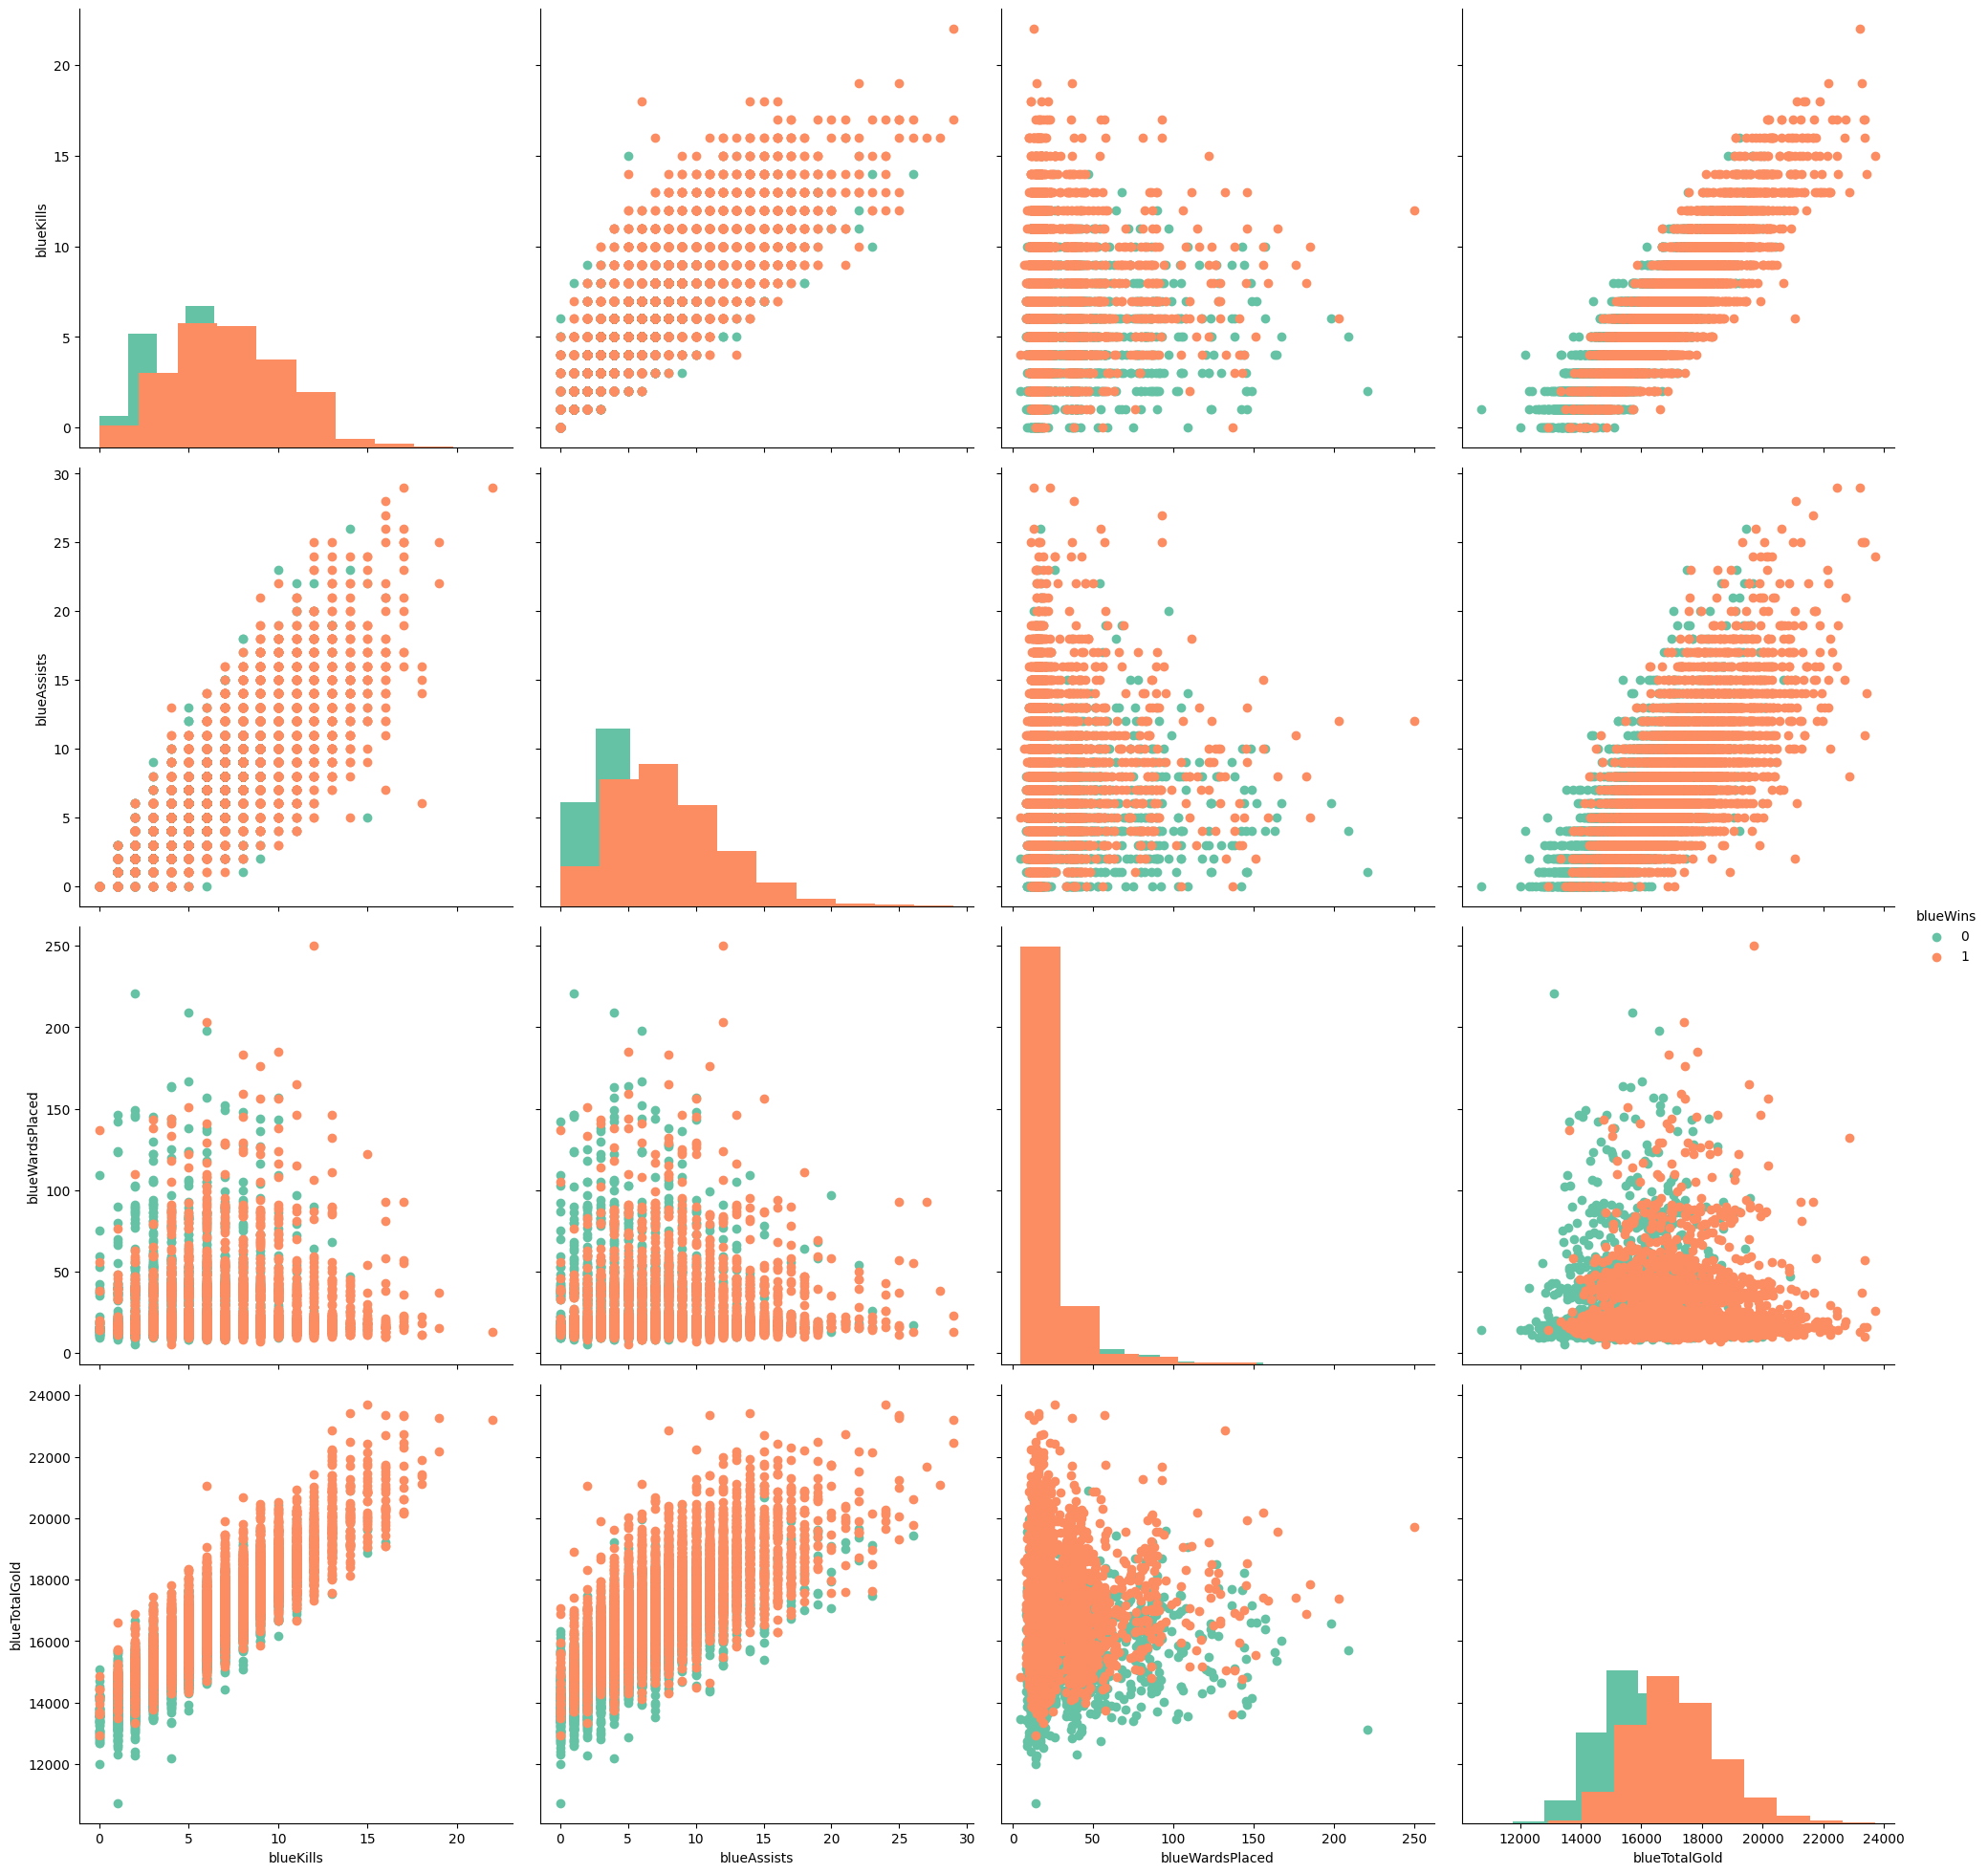

In [7]:
#Compairing the relation between different features of Blue Team
p = sns.PairGrid(data=lol, vars=['blueKills', 'blueAssists', 'blueWardsPlaced', 'blueTotalGold'],
                 hue='blueWins', height=5, palette='Set2')

p.map_diag(plt.hist)
p.map_offdiag(plt.scatter)
p.add_legend();

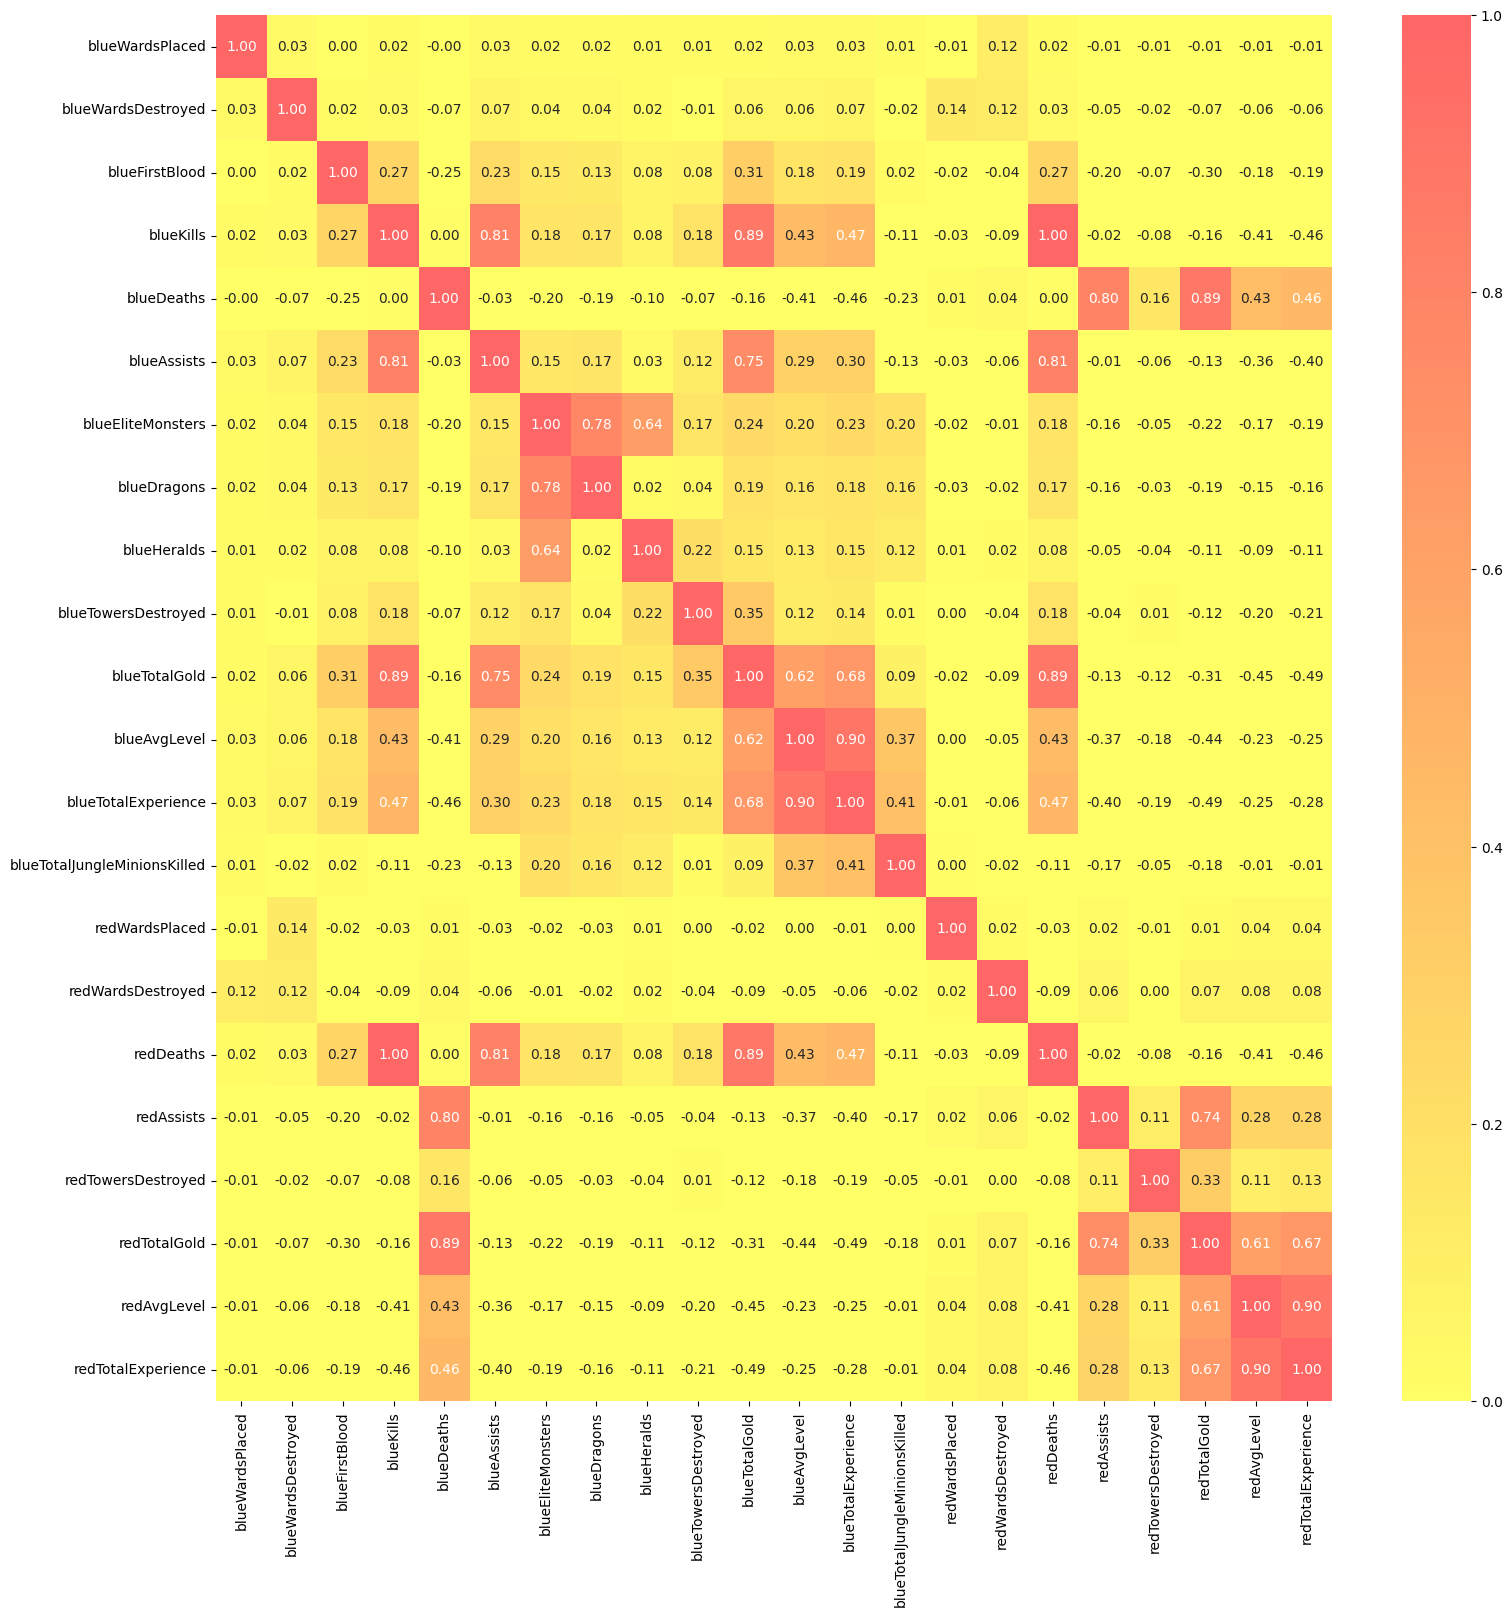

In [8]:
#plotting the Correlation Matrix
plt.figure(figsize=(18,18))
sns.heatmap(lol.drop('blueWins', axis =1 ).corr(),
cmap = 'autumn_r', annot = True, fmt = '0.2f', vmin = 0, alpha = 0.6);

In [9]:
#From the correlation matrix, we can clean the data more
cor_col = ['blueAvgLevel', 'redWardsPlaced', 'redWardsDestroyed', 'redDeaths', 'redAssists', 'redTowersDestroyed',
       'redTotalExperience', 'redTotalGold', 'redAvgLevel']

lol = lol.drop(cor_col, axis = 1)

In [10]:
#Dropping tables that have very less correlation with the winning of Blue
cor_list = lol[lol.columns[1:]].apply(lambda x: x.corr(lol['blueWins']))
cols = []
for col in cor_list.index:
    if(cor_list[col]>0.2 or cor_list[col]<-0.2):
        cols.append(col)       
cols

['blueFirstBlood',
 'blueKills',
 'blueDeaths',
 'blueAssists',
 'blueEliteMonsters',
 'blueDragons',
 'blueTotalGold',
 'blueTotalExperience']

In [11]:
lol = lol[cols]
lol.head()

,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueTotalGold,blueTotalExperience
0,1,9,6,11,0,0,17210,17039
1,0,5,5,5,0,0,14712,16265
2,0,7,11,4,1,1,16113,16221
3,0,4,5,5,1,0,15157,17954
4,0,6,6,6,0,0,16400,18543


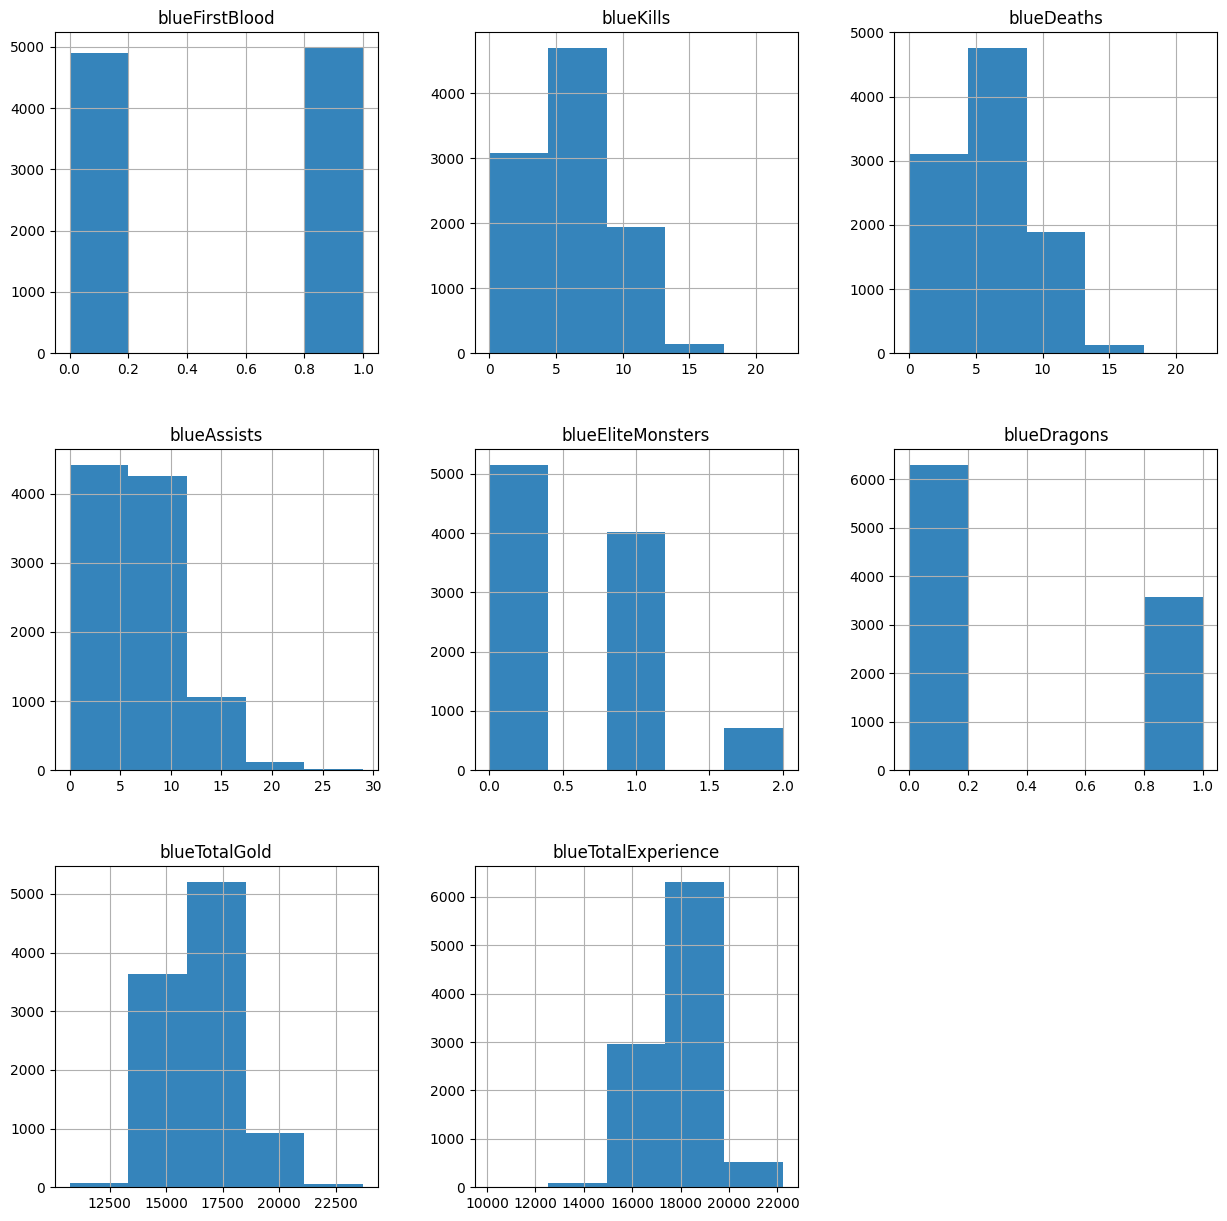

In [12]:
lol.hist(alpha = 0.9, figsize=(15,15), bins=5);

In [13]:
#importing packages for model fitting and scalling
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
import tensorflow.keras as keras

In [14]:
X = lol
y = lol_df['blueWins']
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=32)

In [15]:
#Decision Tree
tree = tree.DecisionTreeClassifier()
grid = {'min_samples_split': [5, 10, 20, 50, 100]},

clf_tree = GridSearchCV(tree, grid, cv=5)
clf_tree.fit(X_train, y_train)

pred_tree = clf_tree.predict(X_test)
acc_tree = accuracy_score(pred_tree, y_test)
print(acc_tree)

0.6771255060728745


In [16]:
#Naive Bayes
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

pred_nb = clf_nb.predict(X_test)
acc_nb = accuracy_score(pred_nb, y_test)
print(acc_nb)

0.707995951417004


In [17]:
#Logistic Regression
lm = LogisticRegression()
lm.fit(X_train, y_train)

pred_lm = lm.predict(X_test)
acc_lm = accuracy_score(pred_lm, y_test)
print(acc_lm)

0.7241902834008097


In [18]:
#KNN Classification
knn = KNeighborsClassifier() 
grid = {"n_neighbors":np.arange(1,100)}
clf_knn = GridSearchCV(knn, grid, cv=5)
clf_knn.fit(X_train,y_train) 

pred_knn = clf_knn.predict(X_test) 
acc_knn = accuracy_score(pred_knn, y_test)
print(acc_knn)

0.7171052631578947


In [19]:
#Random Forest
rf = RandomForestClassifier()
grid = {'n_estimators':[100,200,300,400,500], 'max_depth': [2, 5, 10]}
clf_rf = GridSearchCV(rf, grid, cv=5)
clf_rf.fit(X_train, y_train)

pred_rf = clf_rf.predict(X_test)
# get the accuracy score
acc_rf = accuracy_score(pred_rf, y_test)
print(acc_rf)

0.7201417004048583


In [20]:
# Define the model with dropout regularization
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=X_train.shape[1:]),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.2),  # Add dropout regularization
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dropout(0.2),  # Add dropout regularization
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dropout(0.2),  # Add dropout regularization
    keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='RMSProp', loss='mean_absolute_error', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_split=0.2,batch_size=32, epochs=100)

Epoch 1/100
198/198 [==============================] - 2s 5ms/step - loss: 0.3943 - accuracy: 0.6541 - val_loss: 0.3864 - val_accuracy: 0.6407
Epoch 2/100
198/198 [==============================] - 1s 4ms/step - loss: 0.3689 - accuracy: 0.6789 - val_loss: 0.3703 - val_accuracy: 0.6686
Epoch 3/100
198/198 [==============================] - 1s 4ms/step - loss: 0.3562 - accuracy: 0.6900 - val_loss: 0.3594 - val_accuracy: 0.6692
Epoch 4/100
198/198 [==============================] - 1s 4ms/step - loss: 0.3519 - accuracy: 0.6990 - val_loss: 0.3608 - val_accuracy: 0.6875
Epoch 5/100
198/198 [==============================] - 1s 4ms/step - loss: 0.3450 - accuracy: 0.7080 - val_loss: 0.3374 - val_accuracy: 0.6964
Epoch 6/100
198/198 [==============================] - 1s 4ms/step - loss: 0.3383 - accuracy: 0.7097 - val_loss: 0.3563 - val_accuracy: 0.6781
Epoch 7/100
198/198 [==============================] - 1s 4ms/step - loss: 0.3340 - accuracy: 0.7116 - val_loss: 0.3400 - val_accuracy: 0.6996

Epoch 58/100
198/198 [==============================] - 1s 3ms/step - loss: 0.3048 - accuracy: 0.7222 - val_loss: 0.3126 - val_accuracy: 0.6989
Epoch 59/100
198/198 [==============================] - 1s 3ms/step - loss: 0.3023 - accuracy: 0.7240 - val_loss: 0.3121 - val_accuracy: 0.7002
Epoch 60/100
198/198 [==============================] - 1s 4ms/step - loss: 0.3043 - accuracy: 0.7222 - val_loss: 0.3155 - val_accuracy: 0.7059
Epoch 61/100
198/198 [==============================] - 1s 3ms/step - loss: 0.3056 - accuracy: 0.7203 - val_loss: 0.3059 - val_accuracy: 0.7097
Epoch 62/100
198/198 [==============================] - 1s 3ms/step - loss: 0.3039 - accuracy: 0.7218 - val_loss: 0.3126 - val_accuracy: 0.7002
Epoch 63/100
198/198 [==============================] - 1s 3ms/step - loss: 0.3105 - accuracy: 0.7146 - val_loss: 0.3231 - val_accuracy: 0.7008
Epoch 64/100
198/198 [==============================] - 1s 3ms/step - loss: 0.3090 - accuracy: 0.7175 - val_loss: 0.3184 - val_accuracy:

In [21]:
pred = model.evaluate(X_test, y_test)
prediction_table = {'Decision Tree': [acc_tree], 'Naive Bayes' : [acc_nb], 'Logistic Regression': [acc_lm], 'K_nearest Neighbors': [acc_knn], 'Random Forest': [acc_rf], 'Multi Layer NN': [pred[1]]}
p_table = pd.DataFrame.from_dict(prediction_table, orient = 'index', columns = ["Accuracy Score"])

print(p_table)

62/62 [==============================] - 0s 2ms/step - loss: 0.2910 - accuracy: 0.7247
                     Accuracy Score
Decision Tree              0.677126
Naive Bayes                0.707996
Logistic Regression        0.724190
K_nearest Neighbors        0.717105
Random Forest              0.720142
Multi Layer NN             0.724696
